 # The Sparks Foundation

### Created By- Niharika D

## Task #3- Exploratory Data Analysis - Retail

## Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 

### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv('SampleSuperStore.csv')

### Understanding the data

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
data.shape

(9994, 13)

In [8]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

### Cleaning the data

In [12]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Relationship analysis

In [13]:
corelation= data.corr()

<AxesSubplot:>

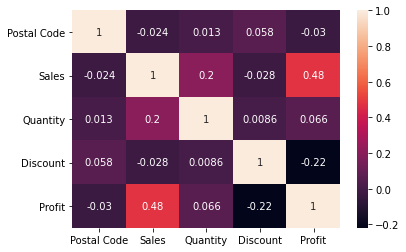

In [14]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

### Visualizing Segment of the Consumer buying from the SuperStore

In [17]:
plt1=data['Segment'].value_counts()
plt1

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:>

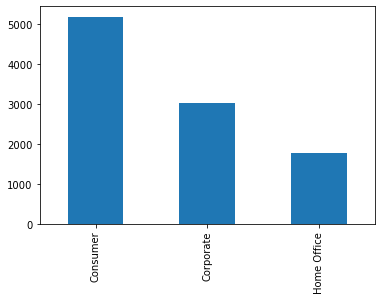

In [18]:
plt1.plot(kind='bar')

### Analysing the Shipment Mode preffered by the Consumer

In [19]:
plt2=data['Ship Mode'].value_counts()
plt2

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:>

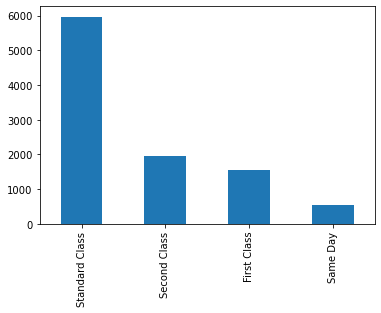

In [20]:
plt2.plot(kind='bar')

### Analysing the category of items in the SuperStore

In [21]:
plt3=data['Category'].value_counts()
plt3

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:>

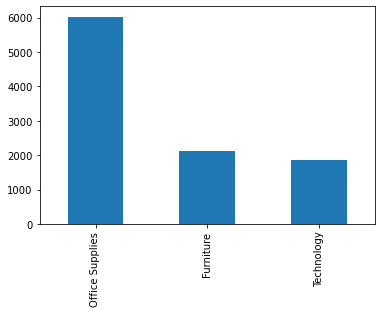

In [22]:
plt3.plot(kind='bar')

### Analysing the Sub-Category of items in the SuperStore

In [23]:
plt4=data['Sub-Category'].value_counts()
plt4

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:>

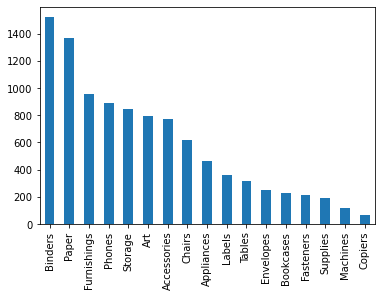

In [24]:
plt4.plot(kind='bar')

### Analysing the Profits as per the Customer Segments in the SuperStore

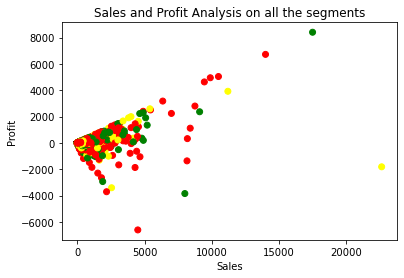

In [25]:
fig, ax = plt.subplots()
colors = {'Consumer':'Red', 'Corporate':'Green', 'Home Office':'Yellow'}
ax.scatter(x=data['Sales'], y=data['Profit'], c=data['Segment'].apply(lambda x: colors[x])) # Scatter plot of different customer segments along with their sales and profit
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales and Profit Analysis on all the segments")
plt.show()

### Overall Average Profit mapping with the Segment given the different values of Discounts

<AxesSubplot:xlabel='Segment,Discount'>

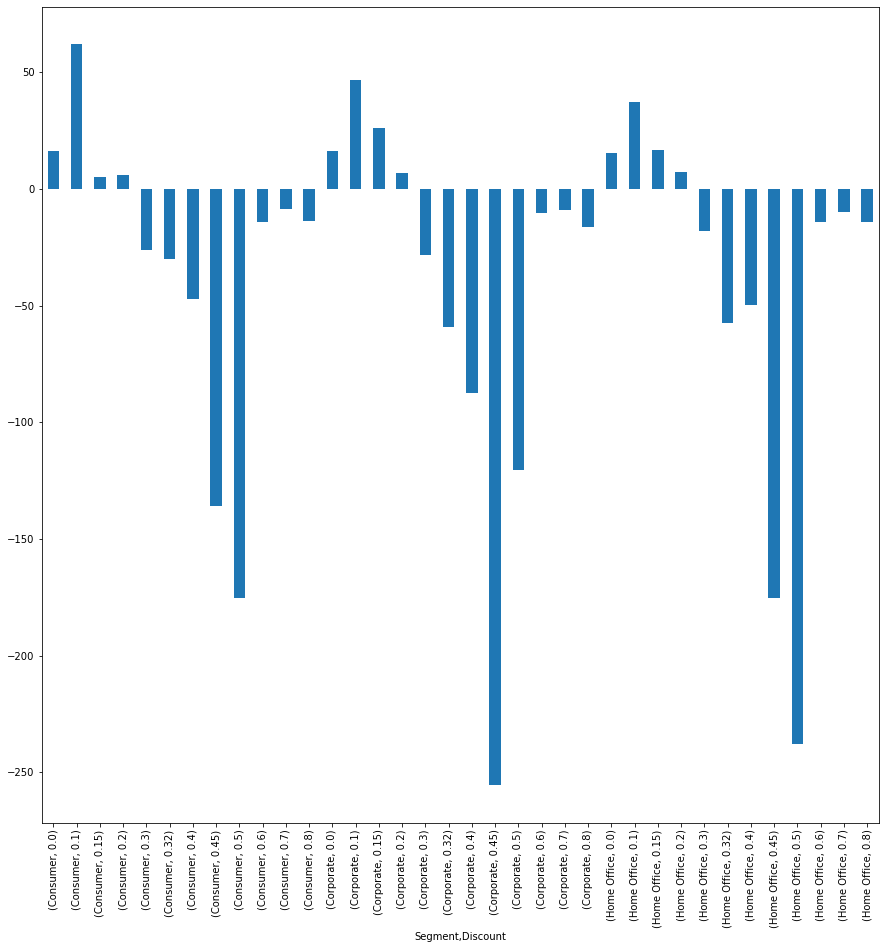

In [26]:
df=data.groupby(['Segment','Discount']).Profit.median()
df.plot(kind='bar', stacked=True, figsize=(15,15))

### States where maximum sales have occured for the SuperStore in United States

Text(0.5, 0, 'No. of Instances of states in the whole dataset')

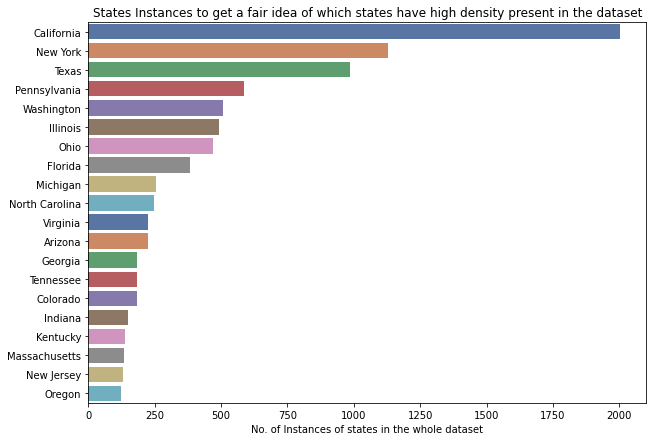

In [27]:
plt.figure(figsize=(10,7))
states=data['State'].value_counts()[0:20] # Get the count of particular states mentioned in the whole column and sort it in descending order of top 20 states
sns.barplot(x=states,y=states.index,palette='deep')
plt.title("States Instances to get a fair idea of which states have high density present in the dataset")
plt.xlabel("No. of Instances of states in the whole dataset")

### Sales Vs Category

<AxesSubplot:title={'center':'Sales vs Category'}, xlabel='Category', ylabel='Sales'>

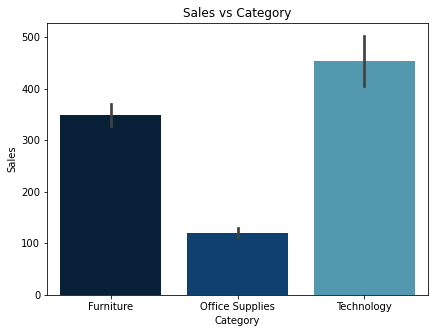

In [28]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Sales vs Category')
sns.barplot(x='Category', y='Sales', data=data,palette='ocean')

<AxesSubplot:title={'center':'Category vs Profit'}, xlabel='Category', ylabel='Profit'>

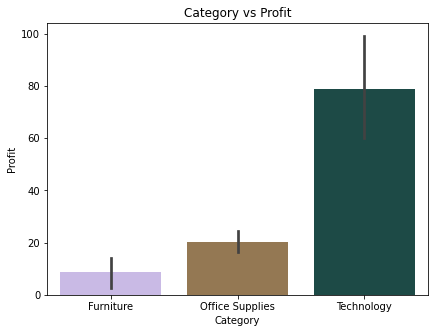

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Category vs Profit')
sns.barplot(x='Category', y='Profit', data=data,palette='cubehelix_r')

### Sub Category Vs Profit

[Text(0, 0, 'Bookcases'),
 Text(1, 0, 'Chairs'),
 Text(2, 0, 'Labels'),
 Text(3, 0, 'Tables'),
 Text(4, 0, 'Storage'),
 Text(5, 0, 'Furnishings'),
 Text(6, 0, 'Art'),
 Text(7, 0, 'Phones'),
 Text(8, 0, 'Binders'),
 Text(9, 0, 'Appliances'),
 Text(10, 0, 'Paper'),
 Text(11, 0, 'Accessories'),
 Text(12, 0, 'Envelopes'),
 Text(13, 0, 'Fasteners'),
 Text(14, 0, 'Supplies'),
 Text(15, 0, 'Machines'),
 Text(16, 0, 'Copiers')]

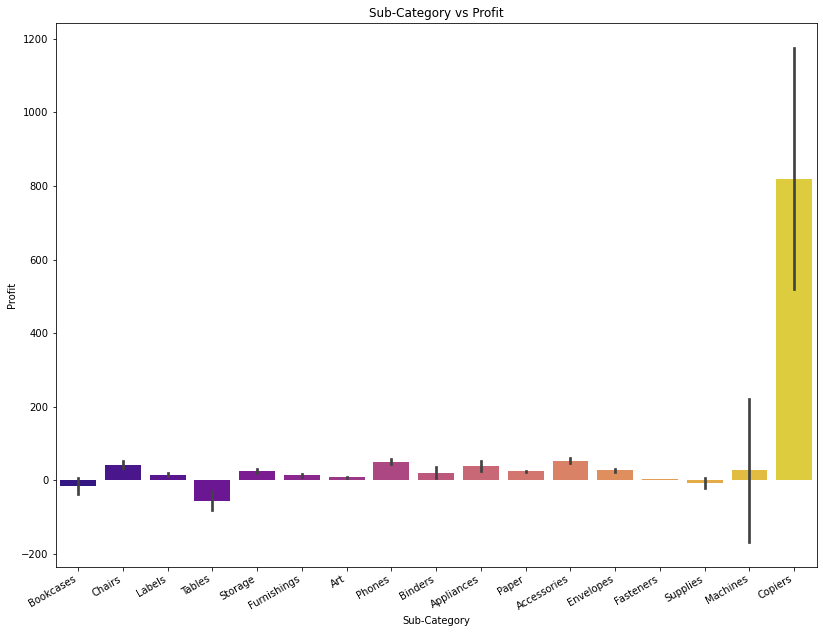

In [30]:
plt.figure(figsize=(30,10))
plt.subplot(1, 2, 2)
plt.title('Sub-Category vs Profit')
pic=sns.barplot(x=data['Sub-Category'],y=data['Profit'],palette='plasma')
pic.set_xticklabels(pic.get_xticklabels(),rotation=30,ha='right')

### Sales Vs Profit Analysis

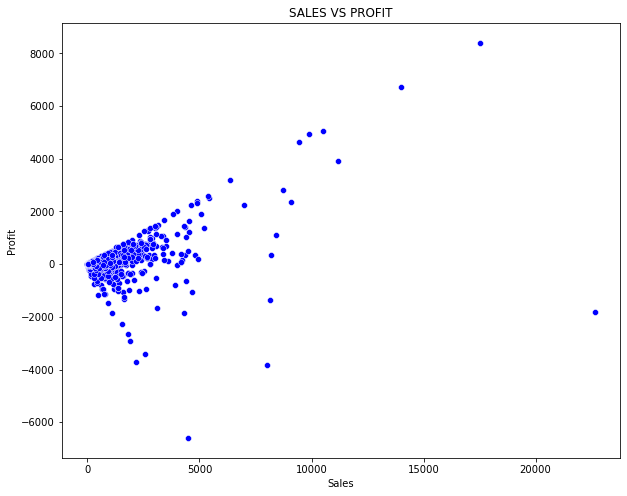

In [31]:
plt.subplots(figsize=(10,8))
ax=sns.scatterplot(y=data['Profit'],x=data['Sales'],color='blue')
plt.title('SALES VS PROFIT')
plt.show()

### Category-wise Analysis

                      Profit        Sales
Category                                 
Furniture         18451.2728  741999.7953
Office Supplies  122490.8008  719047.0320
Technology       145454.9481  836154.0330


<ipython-input-32-1af5ec57a01e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ds =data.groupby('Category')['Profit','Sales'].agg('sum')


Text(0.5, 1.0, 'Category-wise Profit and Sale')

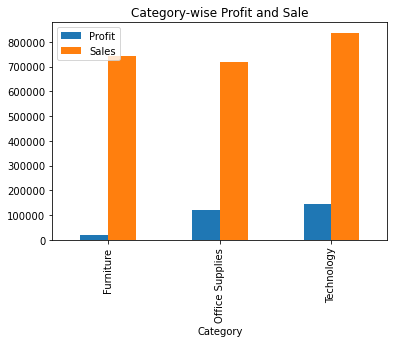

In [32]:
ds =data.groupby('Category')['Profit','Sales'].agg('sum')
print(ds)
ds.plot.bar()
plt.legend(loc='upper left')
plt.title('Category-wise Profit and Sale')

Text(0.5, 1.0, 'Region-wise Ordered Product Categories')

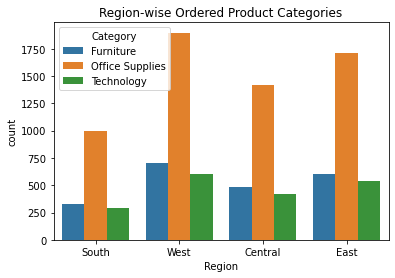

In [33]:
sns.countplot(x=data['Region'], hue=data['Category'])
plt.title('Region-wise Ordered Product Categories')

<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

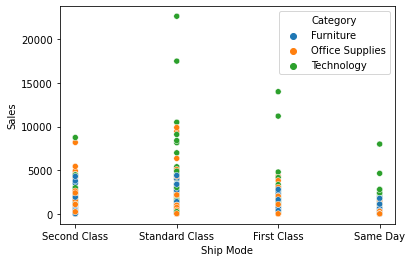

In [34]:
sns.scatterplot(x=data['Ship Mode'], y=data['Sales'], hue=data['Category'])

### Sub-Category-wise Analysis

Text(0.5, 1.0, 'Quantity of different Sub-Categories Ordered')

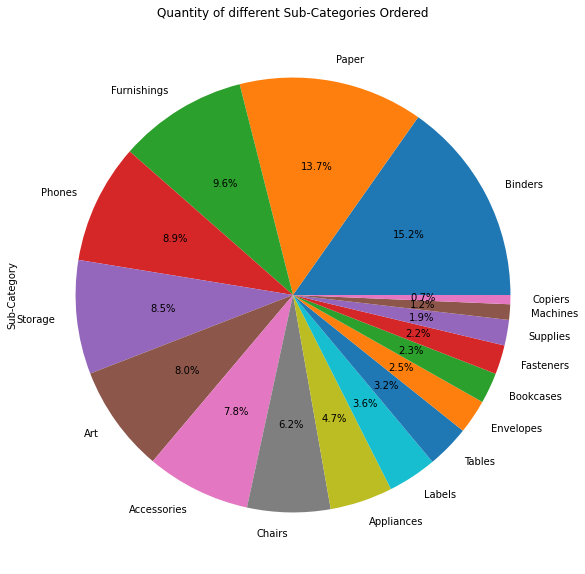

In [35]:
plt.figure(figsize=(10,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Quantity of different Sub-Categories Ordered')

### Region-wise Analysis

In [36]:
regions = data.groupby('Region')
for i,df in regions:
    print(i)

Central
East
South
West


<ipython-input-37-4c712cb8fecd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rw =data.groupby('Region')['Profit','Sales'].agg('sum')


Text(0.5, 1.0, 'Region-wise Profit and Sales')

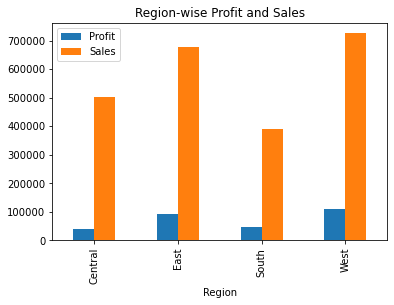

In [37]:
rw =data.groupby('Region')['Profit','Sales'].agg('sum')
rw.plot.bar()
plt.legend(loc='upper left')
plt.title('Region-wise Profit and Sales')

<AxesSubplot:ylabel='Region'>

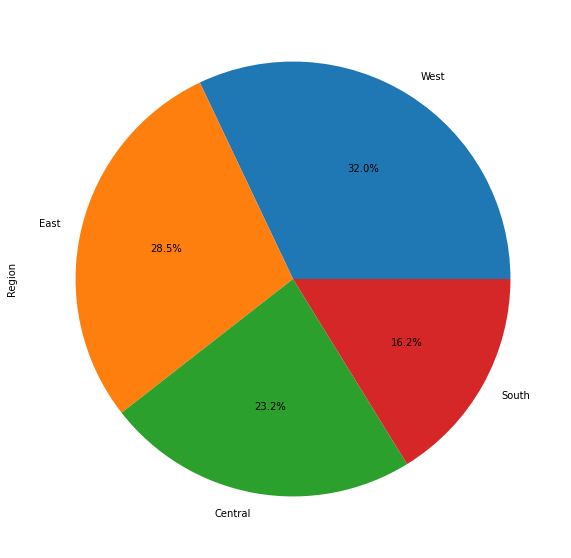

In [38]:
plt.figure(figsize=(10,10))
data['Region'].value_counts().plot.pie(autopct="%1.1f%%")

### City-wise Analysis

In [39]:
city = []
cities = data.groupby('City')
for i,df in cities:
    city.append(i)
city

['Aberdeen',
 'Abilene',
 'Akron',
 'Albuquerque',
 'Alexandria',
 'Allen',
 'Allentown',
 'Altoona',
 'Amarillo',
 'Anaheim',
 'Andover',
 'Ann Arbor',
 'Antioch',
 'Apopka',
 'Apple Valley',
 'Appleton',
 'Arlington',
 'Arlington Heights',
 'Arvada',
 'Asheville',
 'Athens',
 'Atlanta',
 'Atlantic City',
 'Auburn',
 'Aurora',
 'Austin',
 'Avondale',
 'Bakersfield',
 'Baltimore',
 'Bangor',
 'Bartlett',
 'Bayonne',
 'Baytown',
 'Beaumont',
 'Bedford',
 'Belleville',
 'Bellevue',
 'Bellingham',
 'Bethlehem',
 'Beverly',
 'Billings',
 'Bloomington',
 'Boca Raton',
 'Boise',
 'Bolingbrook',
 'Bossier City',
 'Bowling Green',
 'Boynton Beach',
 'Bozeman',
 'Brentwood',
 'Bridgeton',
 'Bristol',
 'Broken Arrow',
 'Broomfield',
 'Brownsville',
 'Bryan',
 'Buffalo',
 'Buffalo Grove',
 'Bullhead City',
 'Burbank',
 'Burlington',
 'Caldwell',
 'Camarillo',
 'Cambridge',
 'Canton',
 'Carlsbad',
 'Carol Stream',
 'Carrollton',
 'Cary',
 'Cedar Hill',
 'Cedar Rapids',
 'Champaign',
 'Chandler',
 

In [40]:
data['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Conroe             1
Hagerstown         1
Lake Elsinore      1
Margate            1
Baytown            1
Name: City, Length: 531, dtype: int64

In [41]:
data['City'].value_counts().min()

1

In [42]:
data['City'].value_counts().max()

915

In [43]:
data[data['City']=='New York City']

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
53,Standard Class,Corporate,United States,New York City,New York,10024,East,Office Supplies,Fasteners,15.260,7,0.0,6.2566
54,Standard Class,Corporate,United States,New York City,New York,10024,East,Technology,Phones,1029.950,5,0.0,298.6855
70,Standard Class,Consumer,United States,New York City,New York,10009,East,Office Supplies,Binders,4.616,1,0.2,1.7310
96,Second Class,Home Office,United States,New York City,New York,10009,East,Furniture,Furnishings,96.530,7,0.0,40.5426
110,Standard Class,Corporate,United States,New York City,New York,10035,East,Furniture,Furnishings,41.960,2,0.0,10.9096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,First Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,199.980,2,0.0,53.9946
9927,First Class,Corporate,United States,New York City,New York,10035,East,Office Supplies,Storage,83.920,4,0.0,20.1408
9938,Standard Class,Corporate,United States,New York City,New York,10009,East,Furniture,Furnishings,60.350,5,0.0,19.9155
9939,Standard Class,Corporate,United States,New York City,New York,10009,East,Office Supplies,Supplies,35.520,4,0.0,9.9456


### According to Sales and Profit , Which state is the best?

In [44]:
df1 = data.groupby(['State'], sort=True).sum()
df1 = df1[['Sales', 'Profit']]
df1.sort_values(by='Profit', ascending=False).head(5)

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Washington,138641.2700,33402.6517
Michigan,76269.6140,24463.1876
Virginia,70636.7200,18597.9504
